In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Star Classifier
The Sloan Digital Sky Survey, or SDSS, is an international collaboration of scientists gathering data from two telescopes in North and South America to build the most detailed Three-Dimensional Imagery of the Universe ever made. The SDSS has produced deep multi-color images of one third of the sky, and created spectra of more than three million astronomical objects.

The SDSS has been searching for DataScientist and they ask you to join their team.

For this job you need to gather data from de SDSS survey and create a star classifier system.

In this project I will follow the **CRISP-DM model**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- Business understanding – What does the business need?
- Data understanding – What data do we have / need? Is it clean?
- Data preparation – How do we organize the data for modeling?
- Modeling – What modeling techniques should we apply?
- Evaluation – Which model best meets the business objectives?
- Deployment – How do stakeholders access the results?

## Business understanding – What does the business need?
Since I don't know much about the SDSS work I have to research for my own and ask to them what do they expect from my work.

They need us to build a star classifier system to distinguish between a star a quasar and a galaxy so they gave me acces to the CasJobs data base from where I will retrive the data set and a data diccionary related to the data I will be working with.

### Content
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

### Feature Description
The table results from a query which joins two tables (actually views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

#### View "PhotoObj"
- objid = Object Identifier
- ra = J2000 Right Ascension (r-band)
- dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://voyages.sdss.org/expeditions/expedition-to-the-solar-system/solarsystem/radec/

- u = better of DeV/Exp magnitude fit
- g = better of DeV/Exp magnitude fit
- r = better of DeV/Exp magnitude fit
- i = better of DeV/Exp magnitude fit
- z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

- run = Run Number
- rereun = Rerun Number
- camcol = Camera column
- field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:

- run number, which identifies the specific scan,
- the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
- the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
- An additional number, rerun, specifies how the image was processed.

#### View "SpecObj"
- specobjid = Object Identifier
- class = object class (galaxy, star or quasar object)
- The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

- redshift = Final Redshift
- plate = plate number
- mjd = MJD of observation
- fiberid = fiber ID
- In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

Further information on SDSS images and their attributes:

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

Acknowledgements
The data released by the SDSS is under public domain. Its taken from the current data release RD14.

More information about the license:

http://www.sdss.org/science/image-gallery/

It was acquired by querying the CasJobs database which contains all data published by the SDSS.

The exact query can be found at:
https://skyserver.sdss.org/dr18/SearchTools/sql

## Data understanding – What data do we have / need? Is it clean?

### Collect initial data
I couldn't create a connection between the ipynb and the SDSS RestApi to retrevie the data becasue is not available any more, what I can do to gather the data is to consult the Cassjob online data base and download it in csv.

![Query](https://drive.google.com/uc?export=view&id=1-15ohpfjae5EDpgIiRFASxiWZqfiuvr0)

![result](https://drive.google.com/uc?export=view&id=17bk3WubzZdgzwYo-bEnajJwLy7e05Sn9)


In [2]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [4]:
dr14 = pd.read_csv("/content/drive/MyDrive/Star_Classifier/Skyserver_adradev_DR14.csv")
dr14

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237646798137852371,121.820752,0.931990,19.37035,17.34262,16.35286,15.92400,15.58903,308,301,5,104,5342663162779901952,GALAXY,0.101993,4745,55892,975
1,1237646798137918215,122.087900,0.843147,19.05249,17.03777,16.07633,15.63148,15.31245,308,301,5,105,5342400104622956544,GALAXY,0.101533,4745,55892,18
2,1237646798138245746,122.863995,0.896151,18.20631,16.89692,16.46658,16.31574,16.28902,308,301,5,110,2316073479176218624,STAR,0.000488,2057,53816,354
3,1237646798138310950,122.981945,0.963857,17.63113,16.55926,16.24861,16.14775,16.13221,308,301,5,111,2338584330990807040,STAR,0.000132,2077,53846,328
4,1237646798138310972,122.988638,0.973743,15.99172,14.98865,14.70003,14.64919,14.50626,308,301,5,111,2316072929420404736,STAR,0.000093,2057,53816,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1237651755091689608,197.462885,3.309304,18.56033,17.22085,16.41203,16.02500,15.73324,1462,301,6,481,591201118567032832,GALAXY,0.110601,525,52295,377
9996,1237651755091755116,197.643419,3.361471,19.48133,18.36759,17.76637,17.34260,17.09888,1462,301,6,482,591198369787963392,GALAXY,0.110570,525,52295,367
9997,1237651755091755128,197.665024,3.297791,19.27929,18.38898,18.03337,17.91430,17.85355,1462,301,6,482,4511676729161392128,STAR,-0.000107,4007,55327,712
9998,1237651755091820576,197.767442,3.418576,17.72724,15.89321,15.09945,14.69967,14.38937,1462,301,6,483,591209364904241152,GALAXY,0.025301,525,52295,407


### Describe data

In [5]:
# Now that I have the data let's see what can figure out from this data set
dr14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  int64  
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  uint64 
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 1.4+ MB


In [6]:
# Basic Statistical Information
dr14.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.237651e+18,185.524241,37.517897,18.648291,17.432209,16.911216,16.653460,16.494506,1331.962800,301.0,3.983600,218.860300,1.682467e+18,0.171432,1494.243400,52901.473500,359.33190
std,7.068703e+11,50.334146,26.782991,0.824173,0.961547,1.108636,1.190100,1.267930,164.620267,0.0,1.717098,180.853785,2.111862e+18,0.430373,1875.698877,1524.776962,206.65437
min,1.237647e+18,27.567750,-8.479532,12.421390,12.666320,11.938500,11.535730,11.313910,308.000000,301.0,1.000000,11.000000,2.995820e+17,-0.004136,266.000000,51578.000000,1.00000
25%,1.237651e+18,142.449612,1.860980,18.224453,16.876600,16.218625,15.875947,15.637037,1334.000000,301.0,3.000000,65.000000,4.864045e+17,0.000043,432.000000,51908.000000,186.00000
50%,1.237651e+18,180.486821,51.096880,18.883760,17.532435,16.910490,16.607845,16.432065,1345.000000,301.0,4.000000,172.000000,5.777553e+17,0.051642,513.000000,52051.000000,370.00000
75%,1.237652e+18,238.811330,60.139752,19.275627,18.063680,17.578250,17.330423,17.213730,1412.000000,301.0,5.000000,331.000000,2.607728e+18,0.101066,2316.000000,53757.000000,518.00000
max,1.237652e+18,262.966558,68.106770,19.599940,19.977270,24.802050,24.361820,27.875140,1462.000000,301.0,6.000000,775.000000,9.319317e+18,6.519422,8277.000000,57448.000000,1000.00000


In [7]:
# We can observe that we have a class variable in the data set, this will be usefull as our objective variable.
# Let's see what it can tell us to build our model
dr14['class'].value_counts()

GALAXY    5368
STAR      3551
QSO       1081
Name: class, dtype: int64

In [8]:
df2 = pd.DataFrame(dr14)
df2

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237646798137852371,121.820752,0.931990,19.37035,17.34262,16.35286,15.92400,15.58903,308,301,5,104,5342663162779901952,GALAXY,0.101993,4745,55892,975
1,1237646798137918215,122.087900,0.843147,19.05249,17.03777,16.07633,15.63148,15.31245,308,301,5,105,5342400104622956544,GALAXY,0.101533,4745,55892,18
2,1237646798138245746,122.863995,0.896151,18.20631,16.89692,16.46658,16.31574,16.28902,308,301,5,110,2316073479176218624,STAR,0.000488,2057,53816,354
3,1237646798138310950,122.981945,0.963857,17.63113,16.55926,16.24861,16.14775,16.13221,308,301,5,111,2338584330990807040,STAR,0.000132,2077,53846,328
4,1237646798138310972,122.988638,0.973743,15.99172,14.98865,14.70003,14.64919,14.50626,308,301,5,111,2316072929420404736,STAR,0.000093,2057,53816,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1237651755091689608,197.462885,3.309304,18.56033,17.22085,16.41203,16.02500,15.73324,1462,301,6,481,591201118567032832,GALAXY,0.110601,525,52295,377
9996,1237651755091755116,197.643419,3.361471,19.48133,18.36759,17.76637,17.34260,17.09888,1462,301,6,482,591198369787963392,GALAXY,0.110570,525,52295,367
9997,1237651755091755128,197.665024,3.297791,19.27929,18.38898,18.03337,17.91430,17.85355,1462,301,6,482,4511676729161392128,STAR,-0.000107,4007,55327,712
9998,1237651755091820576,197.767442,3.418576,17.72724,15.89321,15.09945,14.69967,14.38937,1462,301,6,483,591209364904241152,GALAXY,0.025301,525,52295,407


### Explore data

In [9]:
#rerun and objid std is equal 0, so has only one value --> Drop
df2.drop(['rerun', 'objid'], axis=1, inplace=True)

In [10]:
# Rename classs column to Class to avoid python name errors
df2 = df2.rename(columns={'class':'Class'})

In [11]:
# Class column
Class = df2.Class.astype('category')
Class

0       GALAXY
1       GALAXY
2         STAR
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: Class, Length: 10000, dtype: category
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [12]:
df2

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,Class,redshift,plate,mjd,fiberid
0,121.820752,0.931990,19.37035,17.34262,16.35286,15.92400,15.58903,308,5,104,5342663162779901952,GALAXY,0.101993,4745,55892,975
1,122.087900,0.843147,19.05249,17.03777,16.07633,15.63148,15.31245,308,5,105,5342400104622956544,GALAXY,0.101533,4745,55892,18
2,122.863995,0.896151,18.20631,16.89692,16.46658,16.31574,16.28902,308,5,110,2316073479176218624,STAR,0.000488,2057,53816,354
3,122.981945,0.963857,17.63113,16.55926,16.24861,16.14775,16.13221,308,5,111,2338584330990807040,STAR,0.000132,2077,53846,328
4,122.988638,0.973743,15.99172,14.98865,14.70003,14.64919,14.50626,308,5,111,2316072929420404736,STAR,0.000093,2057,53816,352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,197.462885,3.309304,18.56033,17.22085,16.41203,16.02500,15.73324,1462,6,481,591201118567032832,GALAXY,0.110601,525,52295,377
9996,197.643419,3.361471,19.48133,18.36759,17.76637,17.34260,17.09888,1462,6,482,591198369787963392,GALAXY,0.110570,525,52295,367
9997,197.665024,3.297791,19.27929,18.38898,18.03337,17.91430,17.85355,1462,6,482,4511676729161392128,STAR,-0.000107,4007,55327,712
9998,197.767442,3.418576,17.72724,15.89321,15.09945,14.69967,14.38937,1462,6,483,591209364904241152,GALAXY,0.025301,525,52295,407


### Ploting the different objects, Galaxy, Star, QSO

In [13]:
# Bar chart with the values from every class
alt.Chart(df2).mark_bar().encode(
    x=alt.X('Class:N', title='', axis = alt.Axis(labelAngle=0, labelFontSize=12)),
    y=alt.Y('count(field):Q', title='field'),
    color=("Class:N")
).properties(
    title = f"Objects by its class and field",
    width = 600,
)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
# Scatter matrix
source = df2
alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color="Class:N"
).properties(
    width=150,
    height=150
).repeat(
    row=['u', 'g', 'r', 'i', 'z',],
    column=[ 'u', 'g', 'r', 'i', 'z',]
).interactive()

Output hidden; open in https://colab.research.google.com to view.

### Grouping and Aggregating

In [15]:
pd.crosstab(df2.Class, values=df2.dec, aggfunc=('min', 'median', 'max'),
            columns=df2.assign(val='ra').val)

,max,median,min
val,ra,ra,ra
Class,,,
GALAXY,68.082990,51.603813,-8.479532
QSO,68.106770,53.641737,-6.844004
STAR,67.968669,49.173996,-8.090970


In [16]:
(df2
  .groupby(['Class'])
  .agg(['min', 'max', 'median'])
  .loc[:, 'ra':'z']
  .T
)

Class           GALAXY         QSO        STAR
ra  min      27.567750   27.898458   27.913685
    max     262.966558  262.903096  262.878974
    median  186.887991  188.177067  169.038647
dec min      -8.479532   -6.844004   -8.090970
    max      68.082990   68.106770   67.968669
    median   51.603813   53.641737   49.173996
u   min      14.484260   15.599180   12.421390
    max      19.599940   19.598410   19.599860
    median   18.981510   19.103690   18.536710
g   min      12.666320   14.731220   13.059470
    max      19.976130   19.907410   19.977270
    median   17.485710   18.833640   17.279220
r   min      11.938500   13.871400   12.626800
    max      24.653030   24.802050   24.795390
    median   16.747430   18.644000   16.860660
i   min      11.535730   13.474520   12.093460
    max      24.334170   24.361820   24.356820
    median   16.364985   18.557670   16.701150
z   min      11.313910   13.120310   12.103720
    max      27.875140   22.826910   22.959940
    median   16.090185   18.497430   16.626050

We can conclude that we have quality data, and it exist a strong relationship between the dec(decendance) and u, g, r, i, z variables

## Data preparation – How do we organize the data for modeling?



### Select data

I will create a new data frame by dorpping other unecesary colums as well as the Class column.

I'm goin to carry out a PCA to do this.



In [17]:
data_L=dr14.copy()

In [18]:
data_L.sample(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
67,1237648673458028590,242.981942,-0.485090,18.10821,16.77918,16.21246,16.00480,15.90154,745,301,2,563,389644684177205248,STAR,-0.000418,346,51693,303
6787,1237651273514614905,205.170916,66.689597,19.28816,18.06726,17.29415,16.91299,16.68594,1350,301,5,422,559700655053236224,GALAXY,0.128680,497,51989,467
6443,1237651273513762883,200.457378,67.190787,18.35471,16.95588,16.31540,15.96537,15.70330,1350,301,5,409,558572830984267776,GALAXY,0.054487,496,51988,460
9322,1237651753459777762,148.800462,1.760872,17.63843,16.30624,15.65989,15.30386,15.01954,1462,301,3,156,563015132939053056,GALAXY,0.034895,500,51994,237
3400,1237650797287833953,132.673009,0.891496,19.43205,18.52442,18.24911,18.13656,18.09884,1239,301,6,82,4292144942145314816,STAR,0.001168,3812,55513,780


In [19]:
L_model = LabelEncoder()

In [20]:
for col in dr14.columns:
  data_L[col] = L_model.fit_transform(data_L[col])

data_L.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,0,687,1398,8033,4083,2946,2617,2332,0,0,4,93,9223,0,7508,415,302,848
1,1,699,1245,5815,2957,2075,1747,1582,0,0,4,94,9222,0,7498,415,302,17
2,2,731,1334,2438,2536,3327,3904,4466,0,0,4,99,7228,2,3365,259,159,353
3,3,737,1451,1260,1676,2599,3357,3970,0,0,4,100,7257,2,2855,261,160,327
4,4,738,1471,76,138,250,392,464,0,0,4,100,7227,2,2714,259,159,351


<Axes: >

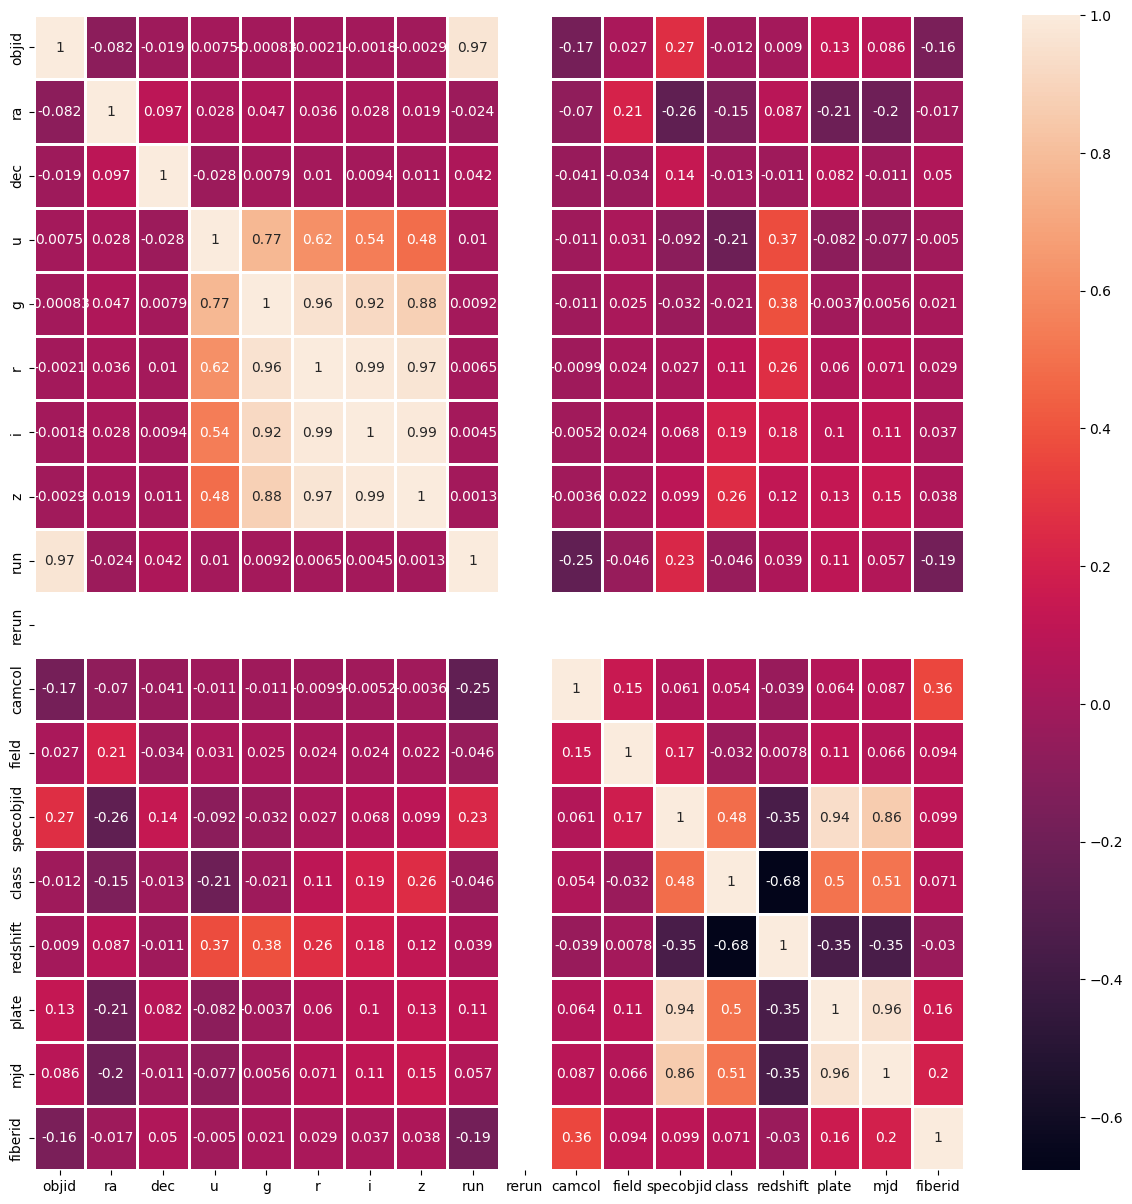

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data_L.corr(),annot=True, linewidths=1)

In [22]:
df2.drop(['ra', 'fiberid','field','plate'], axis=1, inplace=True)

<ipython-input-23-f89746f6e857>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'MJD of observation')

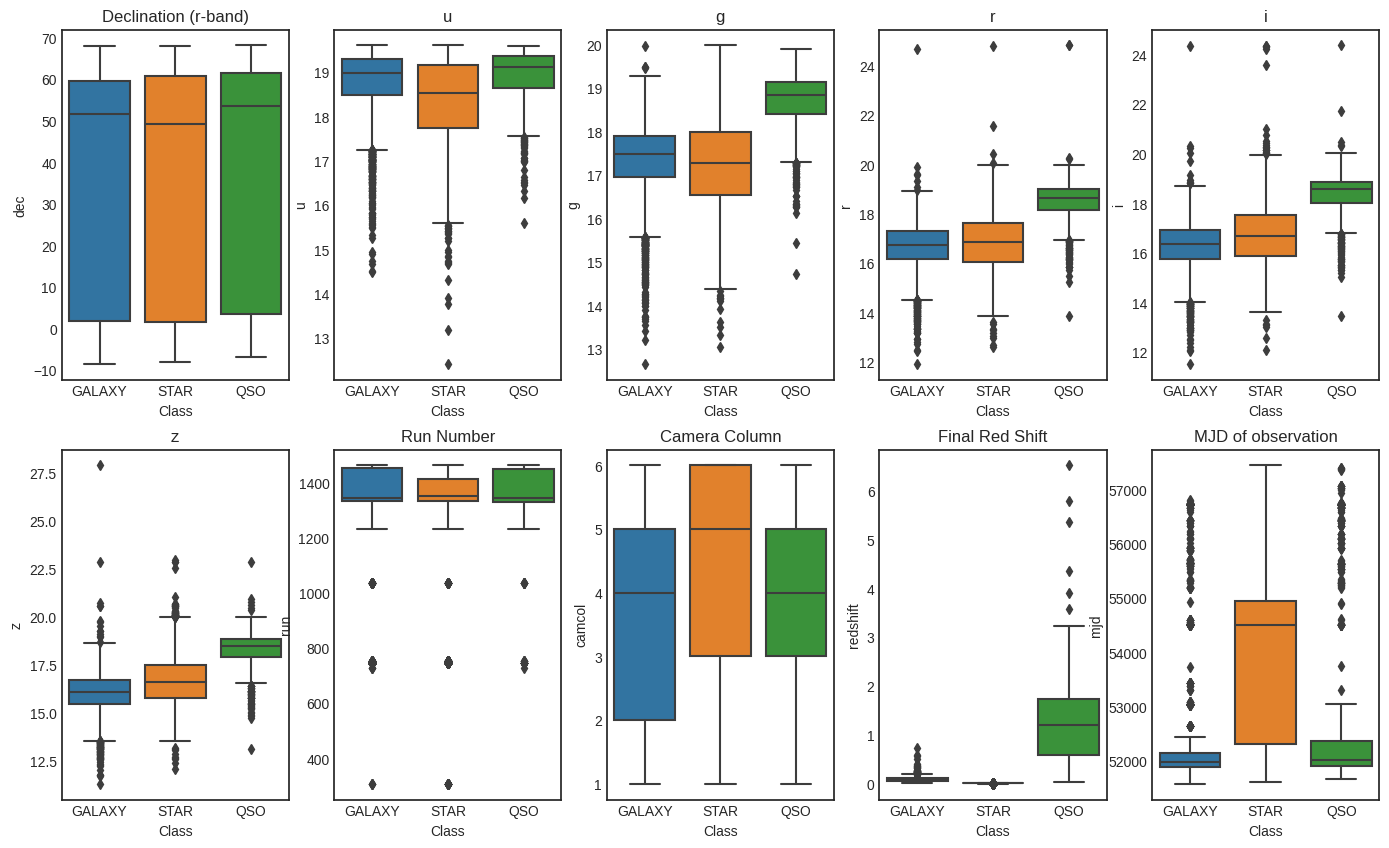

In [23]:
plt.figure(figsize = (17, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(2,5,1)
sns.boxplot(x='Class',y='dec',data=df2)
ax.set_title('Declination (r-band)')
ax=plt.subplot(2,5,2)
sns.boxplot(x='Class',y='u',data=df2)
ax.set_title('u')
ax=plt.subplot(2,5,3)
sns.boxplot(x='Class',y='g',data=df2)
ax.set_title('g')
ax=plt.subplot(2,5,4)
sns.boxplot(x='Class',y='r',data=df2)
ax.set_title('r')
ax=plt.subplot(2,5,5)
sns.boxplot(x='Class',y='i',data=df2)
ax.set_title('i')
ax=plt.subplot(2,5,6)
sns.boxplot(x='Class',y='z',data=df2)
ax.set_title('z')
ax=plt.subplot(2,5,7)
sns.boxplot(x='Class',y='run',data=df2)
ax.set_title('Run Number')
ax=plt.subplot(2,5,8)
sns.boxplot(x='Class',y='camcol',data=df2)
ax.set_title('Camera Column')
ax=plt.subplot(2,5,9)
sns.boxplot(x='Class',y='redshift',data=df2)
ax.set_title('Final Red Shift')
ax=plt.subplot(2,5,10)
sns.boxplot(x='Class',y='mjd',data=df2)
ax.set_title('MJD of observation')

### Format data

To create the new data frame I will define a tweak function with all the transformations I need.


In [24]:
def drop_columns(df):
  dc=['rerun', 'objid', 'ra', 'fiberid','field','plate']
  for col in sorted(df.columns):
    if col in dc:
      df.drop(col, axis=1, inplace=True)
  return df

In [25]:
# The purpose of this function is create new data set replacing the outlier data using the clip function
def tweak_dr(dr14):
  drop_columns(dr14)
  return(dr14
      .rename(columns={'class': 'Class'})
      .assign(dec= lambda df_: df_.dec.clip(lower= dr14.dec.quantile(.25),
                                            upper= dr14.dec.quantile(.75)),
              u= lambda df_: df_.u.clip(lower= dr14.u.quantile(.25),
                                        upper= dr14.u.quantile(.75)),
              g= lambda df_: df_.g.clip(lower= dr14.g.quantile(.25),
                                        upper= dr14.g.quantile(.75)),
              r= lambda df_: df_.r.clip(lower= dr14.r.quantile(.25),
                                        upper= dr14.r.quantile(.75)),
              i= lambda df_: df_.i.clip(lower= dr14.i.quantile(.25),
                                        upper= dr14.i.quantile(.75)),
              z= lambda df_: df_.z.clip(lower= dr14.z.quantile(.25),
                                        upper= dr14.z.quantile(.75)),
              camcol= lambda df_: df_.camcol.clip(lower= dr14.camcol.quantile(.25),
                                                  upper= dr14.camcol.quantile(.75),),

      )

  )

In [26]:
dr14 = pd.read_csv("/content/drive/MyDrive/Star_Classifier/Skyserver_adradev_DR14.csv")
dr14_2=tweak_dr(dr14)

In [27]:
dr14_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        10000 non-null  float64
 1   u          10000 non-null  float64
 2   g          10000 non-null  float64
 3   r          10000 non-null  float64
 4   i          10000 non-null  float64
 5   z          10000 non-null  float64
 6   run        10000 non-null  int64  
 7   camcol     10000 non-null  int64  
 8   specobjid  10000 non-null  uint64 
 9   Class      10000 non-null  object 
 10  redshift   10000 non-null  float64
 11  mjd        10000 non-null  int64  
dtypes: float64(7), int64(3), object(1), uint64(1)
memory usage: 937.6+ KB


## Modeling – What modeling techniques should we apply?

### Select modeling technique

This is a problem of supervised learning nature

Supervised learning learns a function to make prediction of a defined label based on the input data. It can be either classifying data into a category (classification problem) or forecasting an outcome (regression algorithms).

for this reason I will use and compare the next five models:

- 1 Desicion Tree
- 2 K nearest neighbour
- 3 Naive bayes
- 4 Random Forest
- 5 Support Vector Machine

### Generate test design

In [28]:
X = dr14_2.drop('Class', axis=1)
X

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,mjd
0,1.860980,19.275627,17.34262,16.352860,15.924000,15.637037,308,5,5342663162779901952,0.101993,55892
1,1.860980,19.052490,17.03777,16.218625,15.875947,15.637037,308,5,5342400104622956544,0.101533,55892
2,1.860980,18.224453,16.89692,16.466580,16.315740,16.289020,308,5,2316073479176218624,0.000488,53816
3,1.860980,18.224453,16.87660,16.248610,16.147750,16.132210,308,5,2338584330990807040,0.000132,53846
4,1.860980,18.224453,16.87660,16.218625,15.875947,15.637037,308,5,2316072929420404736,0.000093,53816
...,...,...,...,...,...,...,...,...,...,...,...
9995,3.309304,18.560330,17.22085,16.412030,16.025000,15.733240,1462,5,591201118567032832,0.110601,52295
9996,3.361471,19.275627,18.06368,17.578250,17.330423,17.098880,1462,5,591198369787963392,0.110570,52295
9997,3.297791,19.275627,18.06368,17.578250,17.330423,17.213730,1462,5,4511676729161392128,-0.000107,55327
9998,3.418576,18.224453,16.87660,16.218625,15.875947,15.637037,1462,5,591209364904241152,0.025301,52295


In [29]:
y = dr14_2.Class
y

0       GALAXY
1       GALAXY
2         STAR
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: Class, Length: 10000, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

X_train.shape, y_train.shape

((2000, 11), (2000,))

### Feature Scaling

In [31]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Build model

#### Desicion Tree

In [32]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.985875


In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[4251   17   16]
 [  79  816    0]
 [   1    0 2820]]

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99      4284
         QSO       0.98      0.91      0.94       895
        STAR       0.99      1.00      1.00      2821

    accuracy                           0.99      8000
   macro avg       0.99      0.97      0.98      8000
weighted avg       0.99      0.99      0.99      8000



In [34]:
Evaluation=pd.DataFrame(['Decision Tree'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875


#### KNN

In [35]:
knn=KNeighborsClassifier(n_neighbors=5)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
knn.score(X_test,y_test)

0.881875

In [38]:
y_pred=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[4062,    3,  219],
       [ 136,  729,   30],
       [ 549,    8, 2264]])

<Axes: >

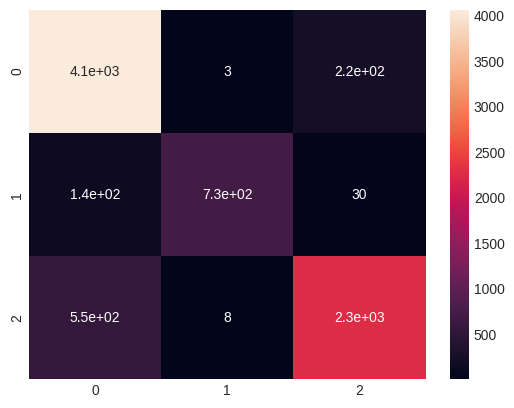

In [39]:
sns.heatmap(cm, annot=True)


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.86      0.95      0.90      4284
         QSO       0.99      0.81      0.89       895
        STAR       0.90      0.80      0.85      2821

    accuracy                           0.88      8000
   macro avg       0.91      0.86      0.88      8000
weighted avg       0.89      0.88      0.88      8000



In [41]:
Evaluation.loc[1,'Algorithm']='KNN'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

####  Naive bayes

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test,y_test)
y_pred=nb.predict(X_test)

In [43]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[3752,  519,   13],
       [  53,  842,    0],
       [   8,   22, 2791]])

<Axes: >

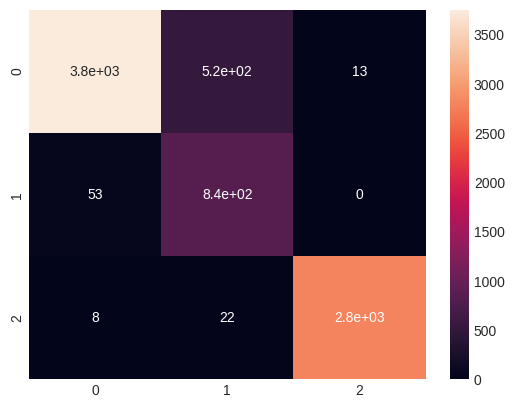

In [44]:
sns.heatmap(cm, annot=True)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.88      0.93      4284
         QSO       0.61      0.94      0.74       895
        STAR       1.00      0.99      0.99      2821

    accuracy                           0.92      8000
   macro avg       0.86      0.94      0.89      8000
weighted avg       0.95      0.92      0.93      8000



In [46]:
Evaluation.loc[2,'Algorithm']='Naive Bayes'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

#### Random Forest

In [47]:
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)
y_pred=classifier1.predict(X_test)

In [48]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4251,   17,   16],
       [  92,  803,    0],
       [   1,    0, 2820]])

<Axes: >

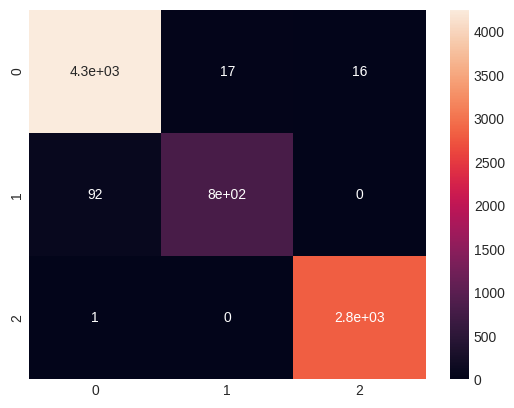

In [49]:
sns.heatmap(cm, annot=True)

In [50]:
Evaluation.loc[3,'Algorithm']='Random Forest'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)


#### Support Vector Machine

In [51]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [52]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4152,   17,  115],
       [  79,  816,    0],
       [  49,    0, 2772]])

In [53]:
Evaluation.loc[4,'Algorithm']='SVM'
Evaluation.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)

### Assess model

In [54]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875
1,KNN,0.881875,0.881875,0.881875,0.881875
2,Naive Bayes,0.923125,0.923125,0.923125,0.923125
3,Random Forest,0.984250,0.984250,0.984250,0.984250
4,SVM,0.967500,0.967500,0.967500,0.967500


## Evaluation – Which model best meets the business objectives?

### Evaluate results:

Do the models meet the business success criteria? Which one(s) should we approve for the business?

In [55]:
Ev=Evaluation.sort_values(by='Accuracy' ,ascending=False)
Ev

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.985875,0.985875,0.985875,0.985875
3,Random Forest,0.984250,0.984250,0.984250,0.984250
4,SVM,0.967500,0.967500,0.967500,0.967500
2,Naive Bayes,0.923125,0.923125,0.923125,0.923125
1,KNN,0.881875,0.881875,0.881875,0.881875


### Review process




*   The Desicion Tree and the Random Forest are the best models that meet the business succes criteria, follow up by the SVM model.

*   Imbalanced datasets are those where there is a severe skew in the class     
distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class, like in this case.

*   This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

*   Even after cliping the data to balance the result It’ll be worth it to dive deeper into label enconding and data scale with the purpouse of searching the best result by comparing of the ML models although Oversample and Undersample results.

*  I bealive the reason for the Decision Tree to be the best algorithm and I quote:  **"Is Able to handle both numerical and categorical data."**

* It's necesary to make a deeper data treatment.





## Deployment – How do stakeholders access the results?

“Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data mining process across the enterprise.”

Luckily I can do both.

### Implementing a repeatable process.

I am already a step ahead on this one because in the formating data process I have defined two functions that are goin to be usefull to automate the process.

The tweak function and the drop_columns function can be used in any data frame with the same caracteristics.

I will repeat the process for the dr15, 16, 17, and 18 data frames of the SDSS


#### Loading Data

In [56]:
import glob

In [57]:
def get_path():
  csv_files = glob.glob('/content/drive/MyDrive/Star_Classifier/*.csv' )

  csv_files.sort()
  return csv_files


In [58]:
def get_dataframes():
  csv_files = get_path()

  dr_list =[]

  for filename in csv_files:
    data = pd.read_csv(filename)
    dr_list.append(data)

  return dr_list

In [59]:
# This shows de load of the data frames
dr14, dr15, dr16, dr17, dr18 = get_dataframes()

In [60]:
dr15.sample(3)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
3411,1237651190820307040,129.794982,50.200421,19.14455,18.24567,17.76194,17.37677,17.40249,1331,301,3,175,501065897021040640,GALAXY,0.072509,445,51873,147
5762,1237650371555950649,180.664719,-1.743185,17.89628,16.64495,16.52841,16.51063,16.50106,1140,301,5,185,372822717352667136,STAR,-0.000181,331,52368,545
2621,1237650797286588682,129.740544,0.959707,19.10767,16.92346,16.01881,15.55927,15.18748,1239,301,6,63,5396637909615878144,GALAXY,0.085187,4793,55648,726


In [61]:
dr16.sample(3)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
5092,1237652948530954305,12.227244,-9.201101,19.41368,17.93106,17.25835,16.86277,16.61951,1740,301,5,103,739810558441711616,GALAXY,0.098311,657,52177,343
1124,1237664853113569524,230.858305,27.963267,19.01827,17.70498,17.08489,16.75076,16.58051,4512,301,3,210,2079578429686048768,GALAXY,0.068468,1847,54176,150
3021,1237662336255197418,239.938434,31.815294,19.10627,17.33716,16.45604,15.97107,15.60213,3926,301,3,95,1580780009277122560,GALAXY,0.056634,1404,52825,60


In [62]:
dr18.sample(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
6633,1237666338653864089,20.587810,-0.486228,19.43205,17.74369,17.07932,16.69382,16.48817,4858,301,2,492,449296215721404416,GALAXY,0.017160,399,51817,226
7389,1237650371555033282,178.593076,-1.667855,19.39356,17.88710,16.98359,16.57105,16.27382,1140,301,5,171,371670704078219264,GALAXY,0.147097,330,52370,450
7749,1237678597551947840,356.247677,2.685788,17.34722,17.38884,17.65448,17.94625,18.24575,7712,301,4,304,4817848389336324096,QSO,1.106605,4279,55508,446


#### Transform Data

In [63]:
def drop_columns(df):
  dc=['rerun', 'objid', 'ra', 'fiberid','field','plate']
  for col in sorted(df.columns):
    if col in dc:
      df.drop(col, axis=1, inplace=True)
  return df

In [64]:
# The purpose of this function is create new data set replacing the outlier data using the clip function
def tweak_df(df_):
  drop_columns(df_)
  return(df_
      .rename(columns={'class': 'Class'})
      .assign(dec= lambda drf: df_.dec.clip(lower= df_.dec.quantile(.25),
                                            upper= df_.dec.quantile(.75)),
              u= lambda df_: df_.u.clip(lower= df_.u.quantile(.25),
                                        upper= df_.u.quantile(.75)),
              g= lambda df_: df_.g.clip(lower= df_.g.quantile(.25),
                                        upper= df_.g.quantile(.75)),
              r= lambda df_: df_.r.clip(lower= df_.r.quantile(.25),
                                        upper= df_.r.quantile(.75)),
              i= lambda df_: df_.i.clip(lower= df_.i.quantile(.25),
                                        upper= df_.i.quantile(.75)),
              z= lambda df_: df_.z.clip(lower= df_.z.quantile(.25),
                                        upper= df_.z.quantile(.75)),
              camcol= lambda df_: df_.camcol.clip(lower= df_.camcol.quantile(.25),
                                                  upper= df_.camcol.quantile(.75),),

      )

  )

In [65]:
dr15 = tweak_df(dr15)
dr15.sample(3)

,dec,u,g,r,i,z,run,camcol,specobjid,Class,redshift,mjd
8023,14.689493,19.266725,18.029592,17.54092,17.275022,17.158212,1035,5,3506177184555442176,STAR,-0.000286,54773
1584,45.498555,18.206925,17.092150,16.81169,16.699740,16.679890,1331,3,496593633391175680,STAR,-0.000165,51868
6828,50.566734,18.634100,17.431670,16.90453,16.549490,16.377790,1331,5,505630794874644480,GALAXY,0.098143,51900


#### Generate test design

In [66]:
X = dr15.drop('Class', axis=1)
X

,dec,u,g,r,i,z,run,camcol,specobjid,redshift,mjd
0,0.089693,19.266725,17.042400,16.205588,15.859775,15.614920,752,4,3722360139651588096,-0.000009,54922
1,0.135285,18.662800,17.214490,16.676370,16.489220,16.391500,752,4,363814405953054720,-0.000055,51615
2,0.126185,19.266725,18.029592,17.474280,17.087320,16.801250,752,4,323274319570429952,0.123111,52023
3,0.049911,18.206925,16.850475,16.205588,15.982330,15.904380,752,4,3722365362331820032,-0.000111,54922
4,0.102557,18.206925,16.850475,16.438690,16.554920,16.613260,752,4,3722365912087633920,0.000590,54922
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.916826,18.728780,18.029592,17.540920,17.036100,16.291100,1231,4,371722106246817792,-0.000100,52370
9996,-0.916826,18.761660,18.029592,17.540920,17.275022,17.158212,1231,4,371722656002631680,1.048052,52370
9997,-0.916826,19.266725,17.690770,16.986890,16.676560,16.438350,1231,4,371711111130540032,0.020118,52370
9998,-0.916826,19.266725,17.362630,16.386490,15.952490,15.614920,1231,4,372749324951513088,0.081532,52368


In [67]:
y = dr15.Class
y

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995      STAR
9996       QSO
9997    GALAXY
9998    GALAXY
9999    GALAXY
Name: Class, Length: 10000, dtype: object

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

X_train.shape, y_train.shape

((2000, 11), (2000,))

In [69]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Build model

#### Desicion Tree

[Text(0.4583333333333333, 0.875, 'GALAXY <= -0.383\ngini = 0.556\nsamples = 2000\nvalue = [1120, 182, 698]'),
 Text(0.25, 0.625, 'GALAXY <= -0.847\ngini = 0.006\nsamples = 700\nvalue = [2, 0, 698]'),
 Text(0.16666666666666666, 0.375, 'GALAXY <= -0.848\ngini = 0.02\nsamples = 196\nvalue = [2, 0, 194]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.01\nsamples = 195\nvalue = [1, 0, 194]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 504\nvalue = [0, 0, 504]'),
 Text(0.6666666666666666, 0.625, 'GALAXY <= 0.102\ngini = 0.241\nsamples = 1300\nvalue = [1118, 182, 0]'),
 Text(0.5, 0.375, 'STAR <= 2.975\ngini = 0.019\nsamples = 1122\nvalue = [1111, 11, 0]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.018\nsamples = 1120\nvalue = [1110, 10, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.8333333333333334, 0.375, 'STAR <= 1.194\ngini = 0.076\nsamples = 178\nvalue = [7, 171, 

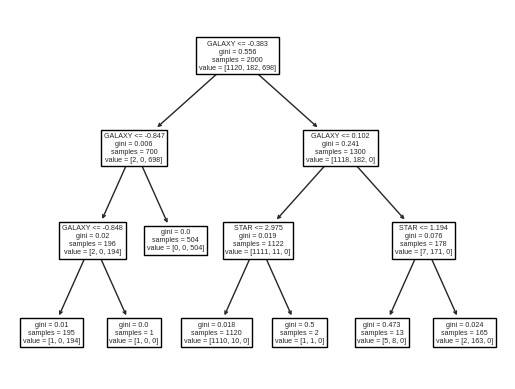

In [70]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

tree.plot_tree(dt, feature_names=y_pred)

In [71]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[4322   33   24]
 [  61  764    1]
 [  15    0 2780]]

Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98      4379
         QSO       0.96      0.92      0.94       826
        STAR       0.99      0.99      0.99      2795

    accuracy                           0.98      8000
   macro avg       0.98      0.97      0.97      8000
weighted avg       0.98      0.98      0.98      8000



In [72]:
Evaluation=pd.DataFrame(['Decision Tree'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,Decision Tree,0.98325,0.98325,0.98325,0.98325
